In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn import metrics 


***import spam.csv from github***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Sanjay-dev-ds/spam_ham_email_detector/master/spam.csv")
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Data Pre-Processing**

***Removing duplicates***

In [ ]:
df = df.drop_duplicates(keep='first')

***Split into Independent and dependent variables***

In [ ]:
x = df['EmailText'].values
y = df['Label'].values

***Text Pre-Processing***

> lowercase the text 

>remove special characters

>normalize certain words

>use stems of words instead of the original form

In [ ]:
porter_stemmer=PorterStemmer()
def preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) 
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) 
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

>create a space between special characters 

>split based on whitespace


In [ ]:
def tokenizer(text):
    text=re.sub("(\\W)"," \\1 ",text)
    return re.split("\\s+",text)

**CountVectorizer** is used to transform a corpus of text to a vector of term

> min_df = 0.06 ( taking 0.6% of Minimum Document Frequency )

> ngram_range=(1,2) ( word level Unigrams and bigrams)

In [ ]:
vectorizer = CountVectorizer(tokenizer=tokenizer,ngram_range=(1,2),min_df=0.006,preprocessor=preprocessor)
x  = vectorizer.fit_transform(x)

***Checking Imbalanced Data***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


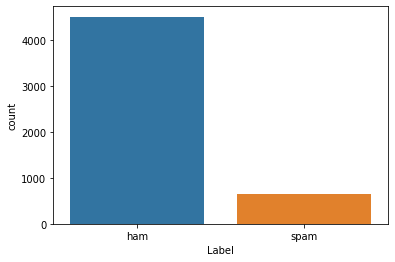

In [ ]:
sns.countplot(df['Label'])

target class has an uneven distribution of observations,So we are using random over sampling method to balance the target variable's obervation

> **Random Oversampling:** Randomly duplicate examples in the minority class (Spam)




In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

# fit predictor and target 
x,y = ros.fit_resample(x, y)

print('Modified dataset shape', Counter(y))

Original dataset shape Counter({'ham': 4516, 'spam': 653})
Modified dataset shape Counter({'ham': 4516, 'spam': 4516})


***Split into training and testing set***

> • Using 80% of data for training with Random State 0.



In [ ]:
x_train , x_test , y_train , y_test   = train_test_split(x, y, test_size =0.2,random_state = 0)



***Build SVM model and fit it using training data***

In [ ]:
model   = SVC(C =1,kernel = "linear" )
model.fit(x_train,y_train)


SVC(C=1, kernel='linear')

***Check accuracy score***

In [ ]:
accuracy = metrics.accuracy_score(y_test, model.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

98.83785279468734

***Classification Report***

In [ ]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       895
        spam       0.98      1.00      0.99       912

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



***Confusion matrix***

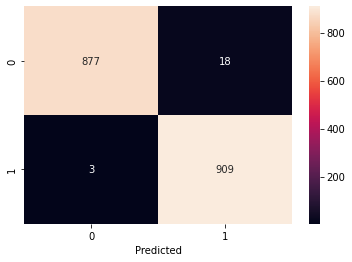

In [ ]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

# **Hyperparameter Optimization using GridSearch CV**

In [ ]:
params  = {"C":[0.2,0.5] , "kernel" : ['linear', 'sigmoid'] }

cval = KFold(n_splits = 2)
model =  SVC();
TunedModel = GridSearchCV(model,params,cv= cval)


TunedModel.fit(x_train,y_train)



GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.2, 0.5], 'kernel': ['linear', 'sigmoid']})

In [ ]:
print(classification_report(y_test,TunedModel.predict(x_test)))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       895
        spam       0.98      1.00      0.99       912

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



🔴**accuracy of tuned model**

In [ ]:
accuracy = metrics.accuracy_score(y_test, TunedModel.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.0038738240177

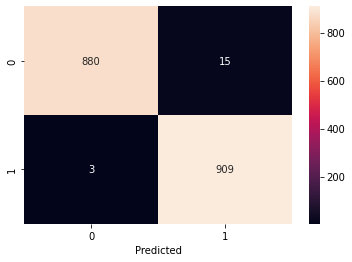

In [ ]:
sns.heatmap(confusion_matrix(y_test,TunedModel.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

#**Using the trained model, predict whether the following five emails are spam or ham** 📧

In [ ]:
mails = ["Hey, you have won a car !!!!. Conrgratzz"
              ,"Dear applicant, Your CV has been recieved. Best regards"
              ,"You have received $1000000 to your account"
              ,"Join with our whatsapp group"
              ,"Kindly check the previous email. Kind Regard"]
for mail in mails:
  is_spam = TunedModel.predict(vectorizer.transform([mail]).toarray())
  print(mail + " : "+ is_spam)

['Hey, you have won a car !!!!. Conrgratzz : spam']
['Dear applicant, Your CV has been recieved. Best regards : ham']
['You have received $1000000 to your account : spam']
['Join with our whatsapp group : ham']
['Kindly check the previous email. Kind Regard : ham']




> IT20388270

---



>Sanjay.J

